In [6]:
import time
from copy import deepcopy
import numpy as np
import torch
import torch.optim as optim
import torch.nn.functional as F

from dhg import Hypergraph
from dhg.data import *
from torch.optim.lr_scheduler import StepLR
from dhg.models import *
from dhg.random import set_seed
from sklearn.model_selection import train_test_split
from dhg.metrics import HypergraphVertexClassificationEvaluator as Evaluator

#### HGNN on CocitationCora Dataset

In [2]:
cora_data = CoauthorshipCora()
G = Hypergraph(cora_data["num_vertices"], cora_data["edge_list"])
print(G)
# train_mask = cora_data["train_mask"]
# val_mask = cora_data["val_mask"]
# test_mask = cora_data["test_mask"]

# # 设置随机种子，以确保结果可复现
random_seed = 42

node_idx = [i for i in range(cora_data['num_vertices'])]
# 将idx_test划分为训练（50%）、验证（25%）和测试（25%）集
idx_train, idx_temp = train_test_split(node_idx, test_size=0.5, random_state=random_seed)
idx_val, idx_test = train_test_split(idx_temp, test_size=0.5, random_state=random_seed)

# 确保划分后的集合没有重叠
assert len(set(idx_train) & set(idx_val)) == 0
assert len(set(idx_train) & set(idx_test)) == 0
assert len(set(idx_val) & set(idx_test)) == 0

train_mask = torch.zeros(cora_data['num_vertices'], dtype=torch.bool)
val_mask = torch.zeros(cora_data['num_vertices'], dtype=torch.bool)
test_mask = torch.zeros(cora_data['num_vertices'], dtype=torch.bool)
train_mask[idx_train] = True
val_mask[idx_val] = True
test_mask[idx_test] = True

# idx_train = np.where(train_mask)[0]
# idx_val = np.where(val_mask)[0]
# idx_test = np.where(test_mask)[0]

X = cora_data["features"]
lbls = cora_data["labels"]
print('X dim:', X.shape)
print('labels:', len(torch.unique(lbls)))

Hypergraph(num_v=2708, num_e=970)
X dim: torch.Size([2708, 1433])
labels: 7


In [3]:
print('train:val:test',len(idx_train),len(idx_val),len(idx_test))

train:val:test 1354 677 677


Epoch: 0, LR: 0.85, Loss: 2.08029, Val Loss: 2.08029, Validation Accuracy: 0.29542097488921715
update best: 0.29542
Epoch: 1, LR: 0.85, Loss: 1.84855, Val Loss: 1.84855, Validation Accuracy: 0.3559822747415066
update best: 0.35598
Epoch: 2, LR: 0.85, Loss: 1.52149, Val Loss: 1.52149, Validation Accuracy: 0.37813884785819796
update best: 0.37814
Epoch: 3, LR: 0.85, Loss: 1.17499, Val Loss: 1.17499, Validation Accuracy: 0.4519940915805022
update best: 0.45199
Epoch: 4, LR: 0.85, Loss: 0.95880, Val Loss: 0.95880, Validation Accuracy: 0.6070901033973413
update best: 0.60709
Epoch: 5, LR: 0.85, Loss: 0.87692, Val Loss: 0.87692, Validation Accuracy: 0.6336779911373708
update best: 0.63368
Epoch: 6, LR: 0.85, Loss: 0.84444, Val Loss: 0.84444, Validation Accuracy: 0.6262924667651403


Epoch: 7, LR: 0.85, Loss: 0.81649, Val Loss: 0.81649, Validation Accuracy: 0.5480059084194978
Epoch: 8, LR: 0.85, Loss: 0.83798, Val Loss: 0.83798, Validation Accuracy: 0.4357459379615953
Epoch: 9, LR: 0.85, Loss: 0.84867, Val Loss: 0.84867, Validation Accuracy: 0.3663220088626292
Epoch: 10, LR: 0.85, Loss: 0.85624, Val Loss: 0.85624, Validation Accuracy: 0.3559822747415066
Epoch: 11, LR: 0.85, Loss: 0.85945, Val Loss: 0.85945, Validation Accuracy: 0.361890694239291
Epoch: 12, LR: 0.85, Loss: 0.90981, Val Loss: 0.90981, Validation Accuracy: 0.3870014771048744
Epoch: 13, LR: 0.85, Loss: 0.87381, Val Loss: 0.87381, Validation Accuracy: 0.38847858197932056
Epoch: 14, LR: 0.85, Loss: 0.84561, Val Loss: 0.84561, Validation Accuracy: 0.39586410635155095
Epoch: 15, LR: 0.85, Loss: 0.87771, Val Loss: 0.87771, Validation Accuracy: 0.49039881831610044
Epoch: 16, LR: 0.85, Loss: 0.83047, Val Loss: 0.83047, Validation Accuracy: 0.5214180206794683
Epoch: 17, LR: 0.85, Loss: 0.80032, Val Loss: 0.800

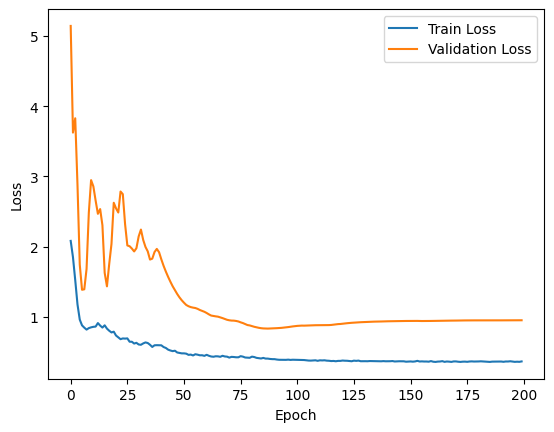

test...
Test Accuracy: 0.7518463810930576
Micro F1: 0.7518463810930576
Macro F1: 0.7331905884025266
Epoch: 0, LR: 8.500000000000002e-06, Loss: 0.38330, Val Loss: 0.38330, Validation Accuracy: 0.7178729689807977
Epoch: 1, LR: 8.500000000000002e-06, Loss: 0.38961, Val Loss: 0.38961, Validation Accuracy: 0.7178729689807977
Epoch: 2, LR: 8.500000000000002e-06, Loss: 0.39302, Val Loss: 0.39302, Validation Accuracy: 0.7178729689807977
Epoch: 3, LR: 8.500000000000002e-06, Loss: 0.38853, Val Loss: 0.38853, Validation Accuracy: 0.7178729689807977
Epoch: 4, LR: 8.500000000000002e-06, Loss: 0.38584, Val Loss: 0.38584, Validation Accuracy: 0.7208271787296898
update best: 0.72083
Epoch: 5, LR: 8.500000000000002e-06, Loss: 0.39944, Val Loss: 0.39944, Validation Accuracy: 0.7208271787296898
Epoch: 6, LR: 8.500000000000002e-06, Loss: 0.38720, Val Loss: 0.38720, Validation Accuracy: 0.7208271787296898
Epoch: 7, LR: 8.500000000000002e-06, Loss: 0.38846, Val Loss: 0.38846, Validation Accuracy: 0.71935007

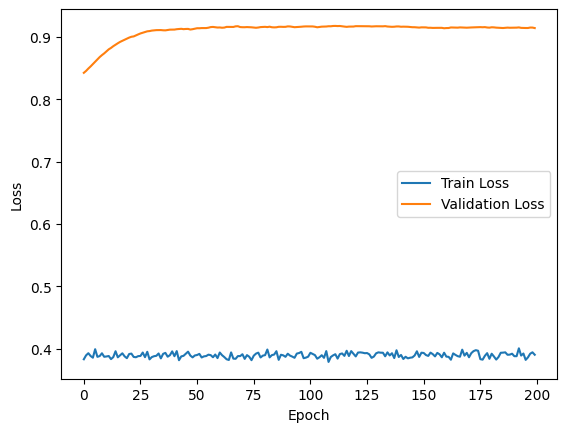

test...
Test Accuracy: 0.7518463810930576
Micro F1: 0.7518463810930576
Macro F1: 0.7334004692420221
Epoch: 0, LR: 8.500000000000004e-11, Loss: 0.39155, Val Loss: 0.39155, Validation Accuracy: 0.7208271787296898
Epoch: 1, LR: 8.500000000000004e-11, Loss: 0.38548, Val Loss: 0.38548, Validation Accuracy: 0.7178729689807977
Epoch: 2, LR: 8.500000000000004e-11, Loss: 0.39291, Val Loss: 0.39291, Validation Accuracy: 0.7178729689807977
Epoch: 3, LR: 8.500000000000004e-11, Loss: 0.39159, Val Loss: 0.39159, Validation Accuracy: 0.7193500738552437
Epoch: 4, LR: 8.500000000000004e-11, Loss: 0.38843, Val Loss: 0.38843, Validation Accuracy: 0.7163958641063516
Epoch: 5, LR: 8.500000000000004e-11, Loss: 0.39201, Val Loss: 0.39201, Validation Accuracy: 0.7163958641063516
Epoch: 6, LR: 8.500000000000004e-11, Loss: 0.39156, Val Loss: 0.39156, Validation Accuracy: 0.7149187592319055
Epoch: 7, LR: 8.500000000000004e-11, Loss: 0.39422, Val Loss: 0.39422, Validation Accuracy: 0.7149187592319055
Epoch: 8, LR

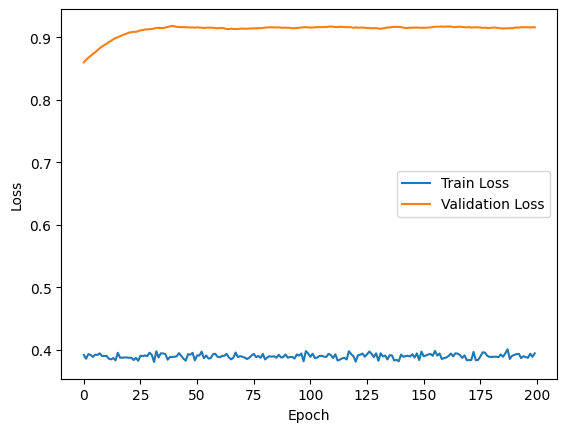

test...
Test Accuracy: 0.7518463810930576
Micro F1: 0.7518463810930576
Macro F1: 0.7334004692420221
Epoch: 0, LR: 8.500000000000007e-16, Loss: 0.39758, Val Loss: 0.39758, Validation Accuracy: 0.7208271787296898
Epoch: 1, LR: 8.500000000000007e-16, Loss: 0.39672, Val Loss: 0.39672, Validation Accuracy: 0.7208271787296898
Epoch: 2, LR: 8.500000000000007e-16, Loss: 0.39462, Val Loss: 0.39462, Validation Accuracy: 0.7178729689807977
Epoch: 3, LR: 8.500000000000007e-16, Loss: 0.39062, Val Loss: 0.39062, Validation Accuracy: 0.7193500738552437
Epoch: 4, LR: 8.500000000000007e-16, Loss: 0.38647, Val Loss: 0.38647, Validation Accuracy: 0.7193500738552437
Epoch: 5, LR: 8.500000000000007e-16, Loss: 0.39161, Val Loss: 0.39161, Validation Accuracy: 0.7163958641063516
Epoch: 6, LR: 8.500000000000007e-16, Loss: 0.38906, Val Loss: 0.38906, Validation Accuracy: 0.7163958641063516
Epoch: 7, LR: 8.500000000000007e-16, Loss: 0.39651, Val Loss: 0.39651, Validation Accuracy: 0.7149187592319055
Epoch: 8, LR

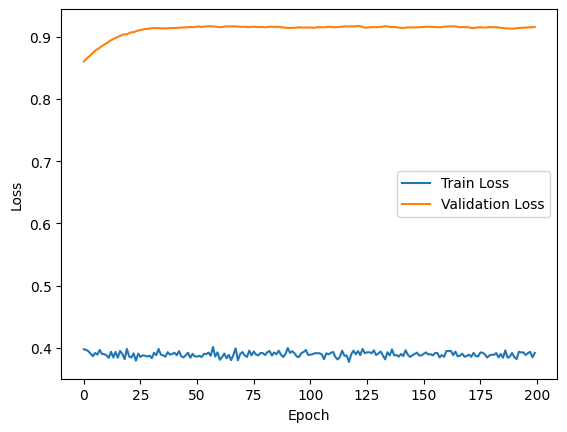

test...
Test Accuracy: 0.7518463810930576
Micro F1: 0.7518463810930576
Macro F1: 0.7334004692420221
Epoch: 0, LR: 8.50000000000001e-21, Loss: 0.38369, Val Loss: 0.38369, Validation Accuracy: 0.7208271787296898
Epoch: 1, LR: 8.50000000000001e-21, Loss: 0.39174, Val Loss: 0.39174, Validation Accuracy: 0.7178729689807977
Epoch: 2, LR: 8.50000000000001e-21, Loss: 0.39310, Val Loss: 0.39310, Validation Accuracy: 0.7193500738552437
Epoch: 3, LR: 8.50000000000001e-21, Loss: 0.38930, Val Loss: 0.38930, Validation Accuracy: 0.7193500738552437
Epoch: 4, LR: 8.50000000000001e-21, Loss: 0.39503, Val Loss: 0.39503, Validation Accuracy: 0.7163958641063516
Epoch: 5, LR: 8.50000000000001e-21, Loss: 0.38661, Val Loss: 0.38661, Validation Accuracy: 0.7163958641063516
Epoch: 6, LR: 8.50000000000001e-21, Loss: 0.39638, Val Loss: 0.39638, Validation Accuracy: 0.7163958641063516
Epoch: 7, LR: 8.50000000000001e-21, Loss: 0.38859, Val Loss: 0.38859, Validation Accuracy: 0.7149187592319055
Epoch: 8, LR: 8.5000

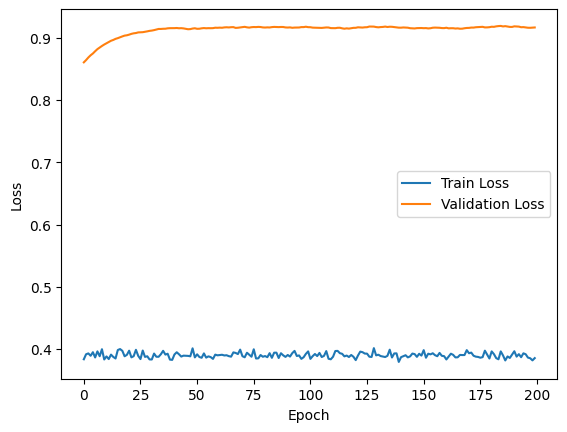

test...
Test Accuracy: 0.7518463810930576
Micro F1: 0.7518463810930576
Macro F1: 0.7334004692420221
test acc: 0.7518463810930576 test acc std: 0.0


test microf1: 0.7518463810930576 test macrof1: 0.733358493074123


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

set_seed(42)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
evaluator = Evaluator(["accuracy", "f1_score", {"f1_score": {"average": "micro"}}])

net = HGNN(X.shape[1], 256, cora_data["num_classes"], use_bn=True)
optimizer = optim.Adam(net.parameters(), lr=0.85, weight_decay=5e-4)
num_epochs = 200
scheduler = StepLR(optimizer, step_size=int(num_epochs/5), gamma=0.1)

X, lbls = X.to(device), lbls.to(device)
G = G.to(device)
net = net.to(device)

best_state = None
best_epoch, best_val = 0, 0

all_acc, all_microf1, all_macrof1 = [],[],[]
for run in range(5):

    train_losses = []  # 新增：用于存储每个epoch的train_loss
    val_losses = []  # 新增：用于存储每个epoch的val_loss
    for epoch in range(num_epochs):
        # train
        net.train()
        optimizer.zero_grad()
        outs = net(X,G)
        outs, lbl = outs[idx_train], lbls[idx_train]
        loss = F.cross_entropy(outs, lbl)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # validation
        net.eval()
        with torch.no_grad():
            outs = net(X,G)
            outs, lbl = outs[idx_val], lbls[idx_val]
            val_loss = F.cross_entropy(outs, lbl)
            val_losses.append(val_loss)  # 新增：记录val_loss

            _, predicted = torch.max(outs, 1)
            correct = (predicted == lbl).sum().item()
            total = lbl.size(0)
            val_acc = correct / total
            print(f"Epoch: {epoch}, LR: {optimizer.param_groups[0]['lr']}, Loss: {loss.item():.5f}, Val Loss: {loss.item():.5f}, Validation Accuracy: {val_acc}")
            

            # Save the model if it has the best validation accuracy
            if val_acc > best_val:
                print(f"update best: {val_acc:.5f}")
                best_val = val_acc
                best_state = deepcopy(net.state_dict())
                torch.save(net.state_dict(), 'hgnn_coauthorcora_best_model.pth')
        # 在每个epoch结束时更新学习率
        scheduler.step()

    print("\ntrain finished!")
    print(f"best val: {best_val:.5f}")

    # 绘制曲线图
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # test
    print("test...")
    net.load_state_dict(best_state)

    net.eval()
    with torch.no_grad():
        outs = net(X, G)
        outs, lbl = outs[idx_test], lbls[idx_test]

        # Calculate accuracy
        _, predicted = torch.max(outs, 1)
        correct = (predicted == lbl).sum().item()
        total = lbl.size(0)
        test_acc = correct / total
        print(f'Test Accuracy: {test_acc}')

        # Calculate micro F1
        micro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='micro')
        print(f'Micro F1: {micro_f1}')

        # Calculate macro F1
        macro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='macro')
        print(f'Macro F1: {macro_f1}')

    all_acc.append(test_acc)
    all_microf1.append(micro_f1)
    all_macrof1.append(macro_f1)

# avg of 5 times
print('test acc:', np.mean(all_acc), 'test acc std:', np.std(all_acc))
print('\n')
print('test microf1:', np.mean(all_microf1), 'test macrof1:', np.mean(all_macrof1))

#### HyperGCN on CoauthorshipCora Dataset

In [18]:
import torch
import AllSet.src.utils
from AllSet.src.utils import *
import torch.nn as nn
import torch.nn.functional as F

from torch_geometric.nn.conv import MessagePassing, GCNConv, GATConv
from AllSet.src.layers import *

import math 

from torch_scatter import scatter
from torch_geometric.utils import softmax

/users/Min/HyperGCL/src/AllSet/src/layers.py:568: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if not (normalization.__class__.__name__ is 'Identity'):
/users/Min/HyperGCL/src/AllSet/src/layers.py:617: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if not (self.f_enc.__class__.__name__ is 'Identity'):
/users/Min/HyperGCL/src/AllSet/src/layers.py:619: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if not (self.f_dec.__class__.__name__ is 'Identity'):


In [19]:
list(cora_data['edge_list'][0])

[235, 355]

In [20]:
num_hes = len(cora_data['edge_list'])
he_idx = [i for i in range(num_hes)]
He_dict = dict(zip(he_idx, list(cora_data['edge_list'][i] for i in range(num_hes))))
He_dict

{0: (235, 355),
 1: (1133, 1666, 1888),
 2: (783, 785),
 3: (570, 1058, 1211, 1246),
 4: (523, 717),
 5: (543, 603, 1163, 1355),
 6: (52,
  140,
  251,
  323,
  535,
  865,
  932,
  1024,
  1505,
  1823,
  2476,
  2487,
  2555,
  2560,
  2580),
 7: (1580, 2329),
 8: (701, 1019, 1659, 1869),
 9: (62,
  270,
  339,
  495,
  573,
  723,
  773,
  1137,
  1983,
  2078,
  2406,
  2425,
  2474,
  2566),
 10: (269, 2415, 2438, 2530),
 11: (19, 424, 571, 1762, 2331, 2495, 2694),
 12: (487, 538, 1822, 2281),
 13: (877, 1010, 1578, 1651),
 14: (40,
  114,
  171,
  488,
  761,
  798,
  1124,
  1390,
  1566,
  1567,
  1661,
  1888,
  2053,
  2054),
 15: (52, 701, 1019, 1539),
 16: (1538, 1724),
 17: (52, 2487, 2555),
 18: (141, 1184, 1959),
 19: (681, 1391, 2437),
 20: (1325, 2047),
 21: (476, 1787, 1871, 2385, 2676),
 22: (357, 803, 1439),
 23: (86, 249, 652),
 24: (516, 2268, 2445, 2569, 2579),
 25: (691, 1213, 1557, 1958, 2058),
 26: (1889, 2648),
 27: (290,
  1098,
  1719,
  1911,
  1925,
  198

In [21]:
V = X.shape[0]
num_features = X.shape[1]
num_layers = 2
num_classes = len(torch.unique(lbls))

print('V:', V)
print('num_feats:', num_features, 'num_layers:', num_layers, 'num_classes:', num_classes)

V: 2708
num_feats: 1433 num_layers: 2 num_classes: 7


In [22]:
HyperGCN_fast = False
HyperGCN_mediators = False
dname = 'cora'
dropout = 0.5
lbls = cora_data["labels"]

In [23]:
device

device(type='cpu')

In [24]:
class HyperGCN(nn.Module):
    def __init__(self, V, E, X, num_features, num_layers, num_classses):
        """
        d: initial node-feature dimension
        h: number of hidden units
        c: number of classes
        """
        super(HyperGCN, self).__init__()
        d, l, c = num_features, num_layers, num_classses
        # cuda = args.cuda  # and torch.cuda.is_available()

        h = [d]
        for i in range(l-1):
            power = l - i + 2
            if dname == 'citeseer':
                power = l - i + 4
            h.append(2**power)
        h.append(c)

        if HyperGCN_fast:
            reapproximate = False
            structure = AllSet.src.utils.Laplacian(V, E, X, HyperGCN_mediators)
        else:
            reapproximate = True
            structure = E

        self.layers = nn.ModuleList([AllSet.src.utils.HyperGraphConvolution(
            h[i], h[i+1], reapproximate) for i in range(l)])
        self.do, self.l = dropout, num_layers
        self.structure, self.m = structure, HyperGCN_mediators

    def reset_parameters(self):
        for layer in self.layers:
            layer.reset_parameters()

    def forward(self, X):
        """
        an l-layer GCN
        """
        do, l, m = self.do, self.l, self.m
        H = X

        for i, hidden in enumerate(self.layers):
            H = F.relu(hidden(self.structure, H, m))
            if i < l - 1:
                V = H
                H = F.dropout(H, do, training=self.training)

        return H

In [25]:
model_hypergcn = HyperGCN(V, He_dict, X, num_features, num_layers, num_classes)
optimizer = optim.Adam(model_hypergcn.parameters(),lr=0.01,weight_decay=5e-4)
model_hypergcn = model_hypergcn.to(device)
# V = V.to(device)
# He_dict = He_dict.to(device)
# num_features = num_features.to(device)
# num_layers = num_layers.to(device)
# num_classes = num_classes.to(device)

Epoch: 0, Time: 0.10920s, Loss: 1.91220
Epoch: 0, Loss: 1.91220, Val Loss: 1.91220, Validation Accuracy: 0.155096011816839
update best: 0.15510
Epoch: 1, Time: 0.08217s, Loss: 1.91382
Epoch: 1, Loss: 1.91382, Val Loss: 1.91382, Validation Accuracy: 0.155096011816839
Epoch: 2, Time: 0.10667s, Loss: 1.91436
Epoch: 2, Loss: 1.91436, Val Loss: 1.91436, Validation Accuracy: 0.155096011816839


Epoch: 3, Time: 0.10804s, Loss: 1.91524
Epoch: 3, Loss: 1.91524, Val Loss: 1.91524, Validation Accuracy: 0.155096011816839
Epoch: 4, Time: 0.09947s, Loss: 1.91608
Epoch: 4, Loss: 1.91608, Val Loss: 1.91608, Validation Accuracy: 0.155096011816839
Epoch: 5, Time: 0.13384s, Loss: 1.91663
Epoch: 5, Loss: 1.91663, Val Loss: 1.91663, Validation Accuracy: 0.155096011816839
Epoch: 6, Time: 0.20583s, Loss: 1.91486
Epoch: 6, Loss: 1.91486, Val Loss: 1.91486, Validation Accuracy: 0.155096011816839
Epoch: 7, Time: 0.16194s, Loss: 1.91441
Epoch: 7, Loss: 1.91441, Val Loss: 1.91441, Validation Accuracy: 0.155096011816839
Epoch: 8, Time: 0.14003s, Loss: 1.91358
Epoch: 8, Loss: 1.91358, Val Loss: 1.91358, Validation Accuracy: 0.155096011816839
Epoch: 9, Time: 0.06486s, Loss: 1.91608
Epoch: 9, Loss: 1.91608, Val Loss: 1.91608, Validation Accuracy: 0.155096011816839
Epoch: 10, Time: 0.08881s, Loss: 1.91422
Epoch: 10, Loss: 1.91422, Val Loss: 1.91422, Validation Accuracy: 0.155096011816839
Epoch: 11, Tim

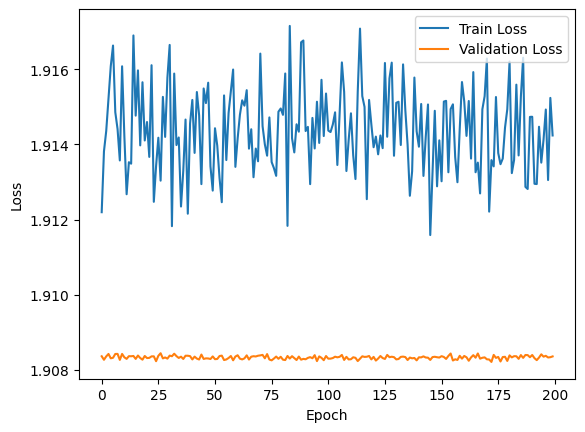

test...
Test Accuracy: 0.16395864106351551
Micro F1: 0.16395864106351551
Macro F1: 0.04024655547498187
Epoch: 0, Time: 0.04119s, Loss: 1.91716
Epoch: 0, Loss: 1.91716, Val Loss: 1.91716, Validation Accuracy: 0.155096011816839
Epoch: 1, Time: 0.03294s, Loss: 1.91424
Epoch: 1, Loss: 1.91424, Val Loss: 1.91424, Validation Accuracy: 0.155096011816839
Epoch: 2, Time: 0.03081s, Loss: 1.91594
Epoch: 2, Loss: 1.91594, Val Loss: 1.91594, Validation Accuracy: 0.155096011816839
Epoch: 3, Time: 0.03436s, Loss: 1.91075
Epoch: 3, Loss: 1.91075, Val Loss: 1.91075, Validation Accuracy: 0.155096011816839
Epoch: 4, Time: 0.03277s, Loss: 1.91449
Epoch: 4, Loss: 1.91449, Val Loss: 1.91449, Validation Accuracy: 0.155096011816839
Epoch: 5, Time: 0.03457s, Loss: 1.91453
Epoch: 5, Loss: 1.91453, Val Loss: 1.91453, Validation Accuracy: 0.155096011816839
Epoch: 6, Time: 0.03373s, Loss: 1.91102
Epoch: 6, Loss: 1.91102, Val Loss: 1.91102, Validation Accuracy: 0.155096011816839
Epoch: 7, Time: 0.03282s, Loss: 1.91

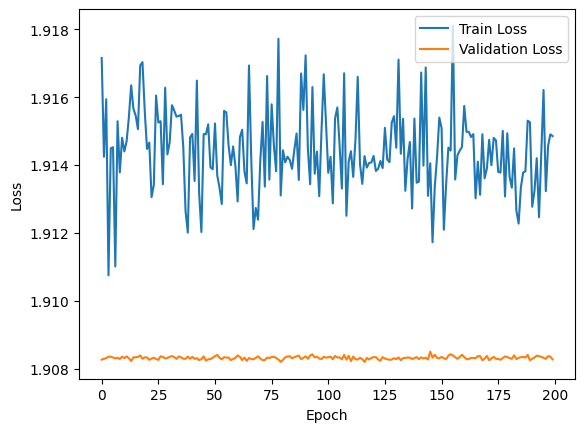

test...
Test Accuracy: 0.16395864106351551
Micro F1: 0.16395864106351551
Macro F1: 0.04024655547498187
Epoch: 0, Time: 0.04526s, Loss: 1.91541
Epoch: 0, Loss: 1.91541, Val Loss: 1.91541, Validation Accuracy: 0.155096011816839
Epoch: 1, Time: 0.05205s, Loss: 1.91286
Epoch: 1, Loss: 1.91286, Val Loss: 1.91286, Validation Accuracy: 0.155096011816839
Epoch: 2, Time: 0.04574s, Loss: 1.91367
Epoch: 2, Loss: 1.91367, Val Loss: 1.91367, Validation Accuracy: 0.155096011816839
Epoch: 3, Time: 0.04174s, Loss: 1.91517
Epoch: 3, Loss: 1.91517, Val Loss: 1.91517, Validation Accuracy: 0.155096011816839
Epoch: 4, Time: 0.04599s, Loss: 1.91536
Epoch: 4, Loss: 1.91536, Val Loss: 1.91536, Validation Accuracy: 0.155096011816839
Epoch: 5, Time: 0.04308s, Loss: 1.91342
Epoch: 5, Loss: 1.91342, Val Loss: 1.91342, Validation Accuracy: 0.155096011816839
Epoch: 6, Time: 0.04355s, Loss: 1.91260
Epoch: 6, Loss: 1.91260, Val Loss: 1.91260, Validation Accuracy: 0.155096011816839
Epoch: 7, Time: 0.04409s, Loss: 1.91

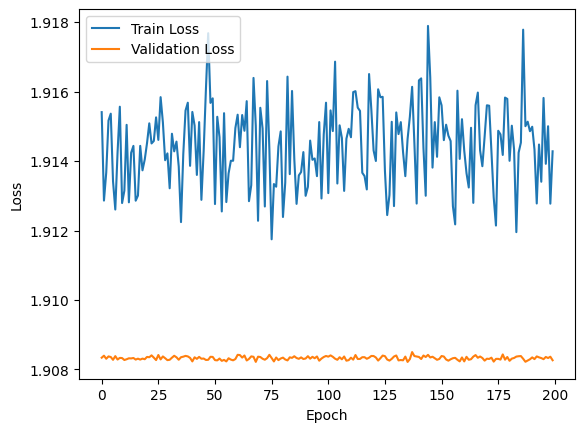

test...
Test Accuracy: 0.16395864106351551
Micro F1: 0.16395864106351551
Macro F1: 0.04024655547498187
Epoch: 0, Time: 0.04594s, Loss: 1.91468
Epoch: 0, Loss: 1.91468, Val Loss: 1.91468, Validation Accuracy: 0.155096011816839
Epoch: 1, Time: 0.04572s, Loss: 1.91244
Epoch: 1, Loss: 1.91244, Val Loss: 1.91244, Validation Accuracy: 0.155096011816839
Epoch: 2, Time: 0.05043s, Loss: 1.91534
Epoch: 2, Loss: 1.91534, Val Loss: 1.91534, Validation Accuracy: 0.155096011816839
Epoch: 3, Time: 0.04021s, Loss: 1.91566
Epoch: 3, Loss: 1.91566, Val Loss: 1.91566, Validation Accuracy: 0.155096011816839
Epoch: 4, Time: 0.04474s, Loss: 1.91721
Epoch: 4, Loss: 1.91721, Val Loss: 1.91721, Validation Accuracy: 0.155096011816839
Epoch: 5, Time: 0.04481s, Loss: 1.91618
Epoch: 5, Loss: 1.91618, Val Loss: 1.91618, Validation Accuracy: 0.155096011816839
Epoch: 6, Time: 0.04350s, Loss: 1.91508
Epoch: 6, Loss: 1.91508, Val Loss: 1.91508, Validation Accuracy: 0.155096011816839
Epoch: 7, Time: 0.04462s, Loss: 1.91

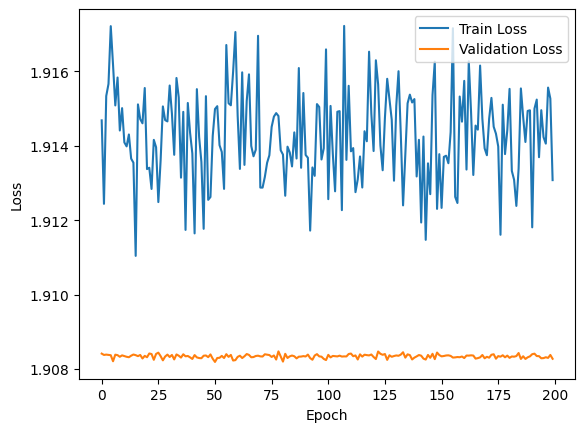

test...
Test Accuracy: 0.16395864106351551
Micro F1: 0.16395864106351551
Macro F1: 0.04024655547498187
Epoch: 0, Time: 0.04486s, Loss: 1.91571
Epoch: 0, Loss: 1.91571, Val Loss: 1.91571, Validation Accuracy: 0.155096011816839
Epoch: 1, Time: 0.04332s, Loss: 1.91349
Epoch: 1, Loss: 1.91349, Val Loss: 1.91349, Validation Accuracy: 0.155096011816839
Epoch: 2, Time: 0.04497s, Loss: 1.91522
Epoch: 2, Loss: 1.91522, Val Loss: 1.91522, Validation Accuracy: 0.155096011816839
Epoch: 3, Time: 0.34113s, Loss: 1.91490
Epoch: 3, Loss: 1.91490, Val Loss: 1.91490, Validation Accuracy: 0.155096011816839
Epoch: 4, Time: 0.04140s, Loss: 1.91557
Epoch: 4, Loss: 1.91557, Val Loss: 1.91557, Validation Accuracy: 0.155096011816839
Epoch: 5, Time: 0.04457s, Loss: 1.91322
Epoch: 5, Loss: 1.91322, Val Loss: 1.91322, Validation Accuracy: 0.155096011816839
Epoch: 6, Time: 0.04938s, Loss: 1.91590
Epoch: 6, Loss: 1.91590, Val Loss: 1.91590, Validation Accuracy: 0.155096011816839
Epoch: 7, Time: 0.04233s, Loss: 1.91

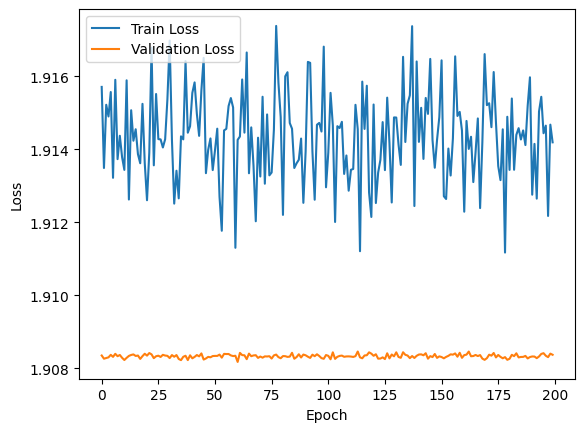

test...
Test Accuracy: 0.16395864106351551
Micro F1: 0.16395864106351551
Macro F1: 0.04024655547498187
test acc: 0.16395864106351551 test acc std: 0.0


test microf1: 0.16395864106351551 test macrof1: 0.04024655547498187


In [27]:
best_state = None
best_epoch, best_val = 0, 0
evaluator = Evaluator(["accuracy", "f1_score", {"f1_score": {"average": "micro"}}])

all_acc, all_microf1, all_macrof1 = [],[],[]
for run in range(5):
    train_losses = []  # 新增：用于存储每个epoch的train_loss
    val_losses = []  # 新增：用于存储每个epoch的val_loss
    for epoch in range(num_epochs):
        model_hypergcn.train()
        st = time.time()
        optimizer.zero_grad()
        outs = model_hypergcn(X)
        outs, lbl = outs[idx_train], lbls[idx_train]
        loss = F.cross_entropy(outs, lbl)
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        print(f"Epoch: {epoch}, Time: {time.time()-st:.5f}s, Loss: {loss.item():.5f}")

        # validation

        model_hypergcn.eval()
        with torch.no_grad():
            outs = model_hypergcn(X)
            outs, lbl = outs[idx_val], lbls[idx_val]
            val_loss = F.cross_entropy(outs, lbl)
            val_losses.append(val_loss.item())

            _, predicted = torch.max(outs, 1)
            correct = (predicted == lbl).sum().item()
            total = lbl.size(0)
            val_acc = correct / total
            print(f"Epoch: {epoch}, Loss: {loss.item():.5f}, Val Loss: {loss.item():.5f}, Validation Accuracy: {val_acc}")
            
            # Save the model if it has the best validation accuracy
            if val_acc > best_val:
                print(f"update best: {val_acc:.5f}")
                best_val = val_acc
                best_state = deepcopy(model_hypergcn.state_dict())
                torch.save(net.state_dict(), 'hypergcn_coauthorcora_best_model.pth')

    print("\ntrain finished!")
    print(f"best val: {best_val:.5f}")

    # 绘制曲线图
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # test
    print("test...")
    model_hypergcn.load_state_dict(best_state)

    model_hypergcn.eval()
    with torch.no_grad():
        outs = model_hypergcn(X)
        outs, lbl = outs[idx_test], lbls[idx_test]

        # Calculate accuracy
        _, predicted = torch.max(outs, 1)
        correct = (predicted == lbl).sum().item()
        total = lbl.size(0)
        test_acc = correct / total
        print(f'Test Accuracy: {test_acc}')

        # Calculate micro F1
        micro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='micro')
        print(f'Micro F1: {micro_f1}')

        # Calculate macro F1
        macro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='macro')
        print(f'Macro F1: {macro_f1}')

    all_acc.append(test_acc)
    all_microf1.append(micro_f1)
    all_macrof1.append(macro_f1)


# avg of 3 times
print('test acc:', np.mean(all_acc), 'test acc std:', np.std(all_acc))
print('\n')
print('test microf1:', np.mean(all_microf1), 'test macrof1:', np.mean(all_macrof1))


        



#### HCHA on CocitationCora Dataset

In [28]:
HCHA_symdegnorm=False
MLP_hidden=64

In [29]:
from AllSet.src.layers import HypergraphConv

class HCHA(nn.Module):
    """
    This model is proposed by "Hypergraph Convolution and Hypergraph Attention" (in short HCHA) and its convolutional layer 
    is implemented in pyg.
    """

    def __init__(self, num_features, num_layers, num_classes, MLP_hidden, dropout, HCHA_symdegnorm):
        super(HCHA, self).__init__()

        self.num_layers = num_layers
        self.dropout = dropout  # Note that default is 0.6
        self.symdegnorm = HCHA_symdegnorm

#         Note that add dropout to attention is default in the original paper
        self.convs = nn.ModuleList()
        self.convs.append(HypergraphConv(num_features,
                                         MLP_hidden, self.symdegnorm))
        for _ in range(self.num_layers-2):
            self.convs.append(HypergraphConv(
                MLP_hidden, MLP_hidden, self.symdegnorm))
        # Output heads is set to 1 as default
        self.convs.append(HypergraphConv(
            MLP_hidden, num_classes, self.symdegnorm))

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()

    def forward(self, x, edge_index):

        # x = data.x
        # edge_index = data.edge_index

        for i, conv in enumerate(self.convs[:-1]):
            x = F.elu(conv(x, edge_index))
            x = F.dropout(x, p=self.dropout, training=self.training)

#         x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)

        return x

In [30]:
G.num_v

2708

In [31]:
def from_hypergraph_clique(
    hypergraph: "Hypergraph", weighted: bool = False, miu: float = 1.0, device: torch.device = torch.device("cpu"),
) -> "Graph":
    r"""Construct a graph from a hypergraph with clique expansion refering to `Higher Order Learning with Graphs <https://homes.cs.washington.edu/~sagarwal/holg.pdf>`_ paper.

    Args:
        ``hypergraph`` (``Hypergraph``): The source hypergraph.
        ``weighted`` (``bool``, optional): Whether to construct a weighted graph. Defaults to ``False``.
        ``miu`` (``float``, optional): The parameter of clique expansion. Defaults to ``1.0``.
        ``device`` (``torch.device``): The device to store the graph. Defaults to ``torch.device("cpu")``.
    """
    num_v = hypergraph.num_v
    miu = 1.0
    adj = miu * hypergraph.H.mm(hypergraph.H_T).coalesce().cpu().clone()
    src_idx, dst_idx = adj._indices()
    edge_mask = src_idx < dst_idx
    edge_list = torch.stack([src_idx[edge_mask], dst_idx[edge_mask]]).t().cpu().numpy().tolist()
    # if weighted:
    #     e_weight = adj._values()[edge_mask].numpy().tolist()
    #     _g = Graph(num_v, edge_list, e_weight, merge_op="sum", device=device)
    # else:
    #     _g = Graph(num_v, edge_list, merge_op="mean", device=device)
    return num_v, edge_list

In [32]:
G.e[0]

[(235, 355),
 (1133, 1666, 1888),
 (783, 785),
 (570, 1058, 1211, 1246),
 (523, 717),
 (543, 603, 1163, 1355),
 (52,
  140,
  251,
  323,
  535,
  865,
  932,
  1024,
  1505,
  1823,
  2476,
  2487,
  2555,
  2560,
  2580),
 (1580, 2329),
 (701, 1019, 1659, 1869),
 (62, 270, 339, 495, 573, 723, 773, 1137, 1983, 2078, 2406, 2425, 2474, 2566),
 (269, 2415, 2438, 2530),
 (19, 424, 571, 1762, 2331, 2495, 2694),
 (487, 538, 1822, 2281),
 (877, 1010, 1578, 1651),
 (40, 114, 171, 488, 761, 798, 1124, 1390, 1566, 1567, 1661, 1888, 2053, 2054),
 (52, 701, 1019, 1539),
 (1538, 1724),
 (52, 2487, 2555),
 (141, 1184, 1959),
 (681, 1391, 2437),
 (1325, 2047),
 (476, 1787, 1871, 2385, 2676),
 (357, 803, 1439),
 (86, 249, 652),
 (516, 2268, 2445, 2569, 2579),
 (691, 1213, 1557, 1958, 2058),
 (1889, 2648),
 (290, 1098, 1719, 1911, 1925, 1984, 2087, 2133, 2199, 2206, 2259, 2261, 2379),
 (1737, 1936),
 (930, 948, 1043, 1254, 1282),
 (400, 701, 1019, 1189),
 (54, 129, 1175, 1204, 1628, 1728, 2309, 2334),

In [33]:
import numpy as np

# 将超边列表转换为边索引的两个维度
node_list = []
he_list = []
he_id = 0
for hyperedge in G.e[0]:
    node_list += list(hyperedge)
    he_list += [he_id] * len(hyperedge)
    he_id += 1

# 计算偏移量，将节点索引从最小值开始重新映射为从0开始的连续整数
node_idx_min = np.min(node_list)
node_list = [x - node_idx_min for x in node_list]

# 构造边索引数组
edge_index = np.array([node_list, he_list])

In [34]:
edge_index.shape, X.shape, len(node_list)

((2, 4353), torch.Size([2708, 1433]), 4353)

In [35]:
edge_index = torch.LongTensor(edge_index) # 节点index-超边index
edge_index[1] -= edge_index[1].min()
edge_index, torch.max(edge_index), edge_index.shape

(tensor([[ 235,  355, 1133,  ..., 1912, 1942, 2573],
         [   0,    0,    1,  ...,  968,  969,  969]]),
 tensor(2707),
 torch.Size([2, 4353]))

In [36]:
X.shape, len(he_list), max(he_list)

(torch.Size([2708, 1433]), 4353, 969)

In [37]:
import numpy as np

# 初始化超边特征列表
hyperedge_features = []

# 遍历每个超边
for hyperedge in G.e[0]:
    hyperedge = list(hyperedge) # 元组转换为列表
    # 根据超边中的节点索引获取对应的节点特征
    hyperedge_node_features = X[hyperedge,:]
    # print(hyperedge_node_features.shape)
    
    # 对节点特征进行聚合操作，例如求和、均值或最大值
    aggregated_feature = torch.sum(hyperedge_node_features, dim=0)  # 以求和为例

    
    # 将聚合后的特征添加到超边特征列表中
    hyperedge_features.append(aggregated_feature)

# 将超边特征转换为数组
hyperedge_features = np.array(hyperedge_features)
hyperedge_features.shape

(970, 1433)

In [38]:
X_he = torch.FloatTensor(hyperedge_features)
X_he.shape

torch.Size([970, 1433])

In [39]:
# edge_index = G.H.to_dense().to(torch.long)
# edge_index, edge_index.shape, type(edge_index)

In [40]:
import numpy as np
import torch
from scipy import sparse
from torch_geometric.data import Data
from torch_sparse import coalesce

def create_pyg_data(X, H):
    # X: Node features, H: Hypergraph adjacency matrix

    # Convert X to a dense tensor
    x = torch.FloatTensor(X.to_dense())

    # Convert H to a dense tensor and then to a coo_matrix
    H_dense = H.to_dense()
    coo_H = sparse.coo_matrix(H_dense.numpy())

    # Build edge_index from COO format
    edge_index = torch.LongTensor(np.vstack((coo_H.col, coo_H.row)))

    # Create a Data object
    data = Data(x=x, edge_index=edge_index)

    # Coalesce edge_index to remove duplicates
    total_num_nodes = X.shape[0]  # get the total number of nodes
    data.edge_index, _ = coalesce(data.edge_index, None, total_num_nodes, total_num_nodes)

    return data

# Example usage:
# Assuming X is your node features and H is your hypergraph adjacency matrix
data = create_pyg_data(X, G.H)
data

Data(x=[2708, 1433], edge_index=[2, 4353])

In [41]:
G.H

tensor(indices=tensor([[   0,    1,    2,  ..., 2706, 2706, 2707],
                       [ 888,  682,  389,  ...,  353,  407,  835]]),
       values=tensor([1., 1., 1.,  ..., 1., 1., 1.]),
       size=(2708, 970), nnz=4353, layout=torch.sparse_coo)

In [42]:
model_hcha = HCHA(num_features, num_layers, num_classes, MLP_hidden, dropout, HCHA_symdegnorm)
optimizer = optim.Adam(model_hcha.parameters(),lr=0.5,weight_decay=5e-4)
model_hcha = model_hcha.to(device)
model_hcha

HCHA(
  (convs): ModuleList(
    (0): HypergraphConv(1433, 64)
    (1): HypergraphConv(64, 7)
  )
)

Epoch: 0, Time: 0.02720s, Loss: 1.94604
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: False
    weight_decay: 0.0005
), Loss: 1.94604, Val Loss: 1.94604, Validation Accuracy: 0.22156573116691286
update best: 0.22157
Epoch: 1, Time: 0.01937s, Loss: 2.93458
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: False
    weight_decay: 0.0005
), Loss: 2.93458, Val Loss: 2.93458, Validation Accuracy: 0.31610044313146235
update best: 0.31610
Epoch: 2, Time: 0.01978s, Loss: 5.61976
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: Fa

Epoch: 14, Time: 0.01463s, Loss: 3.08923
Epoch: 14, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: False
    weight_decay: 0.0005
), Loss: 3.08923, Val Loss: 3.08923, Validation Accuracy: 0.258493353028065
Epoch: 15, Time: 0.02233s, Loss: 2.29904
Epoch: 15, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: False
    weight_decay: 0.0005
), Loss: 2.29904, Val Loss: 2.29904, Validation Accuracy: 0.23190546528803546
Epoch: 16, Time: 0.01837s, Loss: 2.52679
Epoch: 16, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: False
    weight_decay: 0.0005
), Loss: 

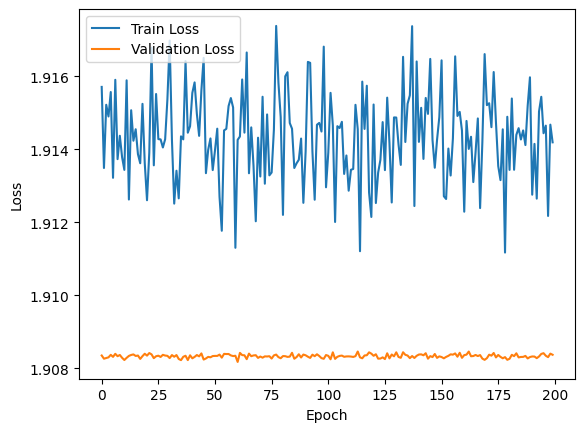

test...
Test Accuracy: 0.3293943870014771
Micro F1: 0.3293943870014771
Macro F1: 0.16550368436240728
Epoch: 0, Time: 0.01761s, Loss: 1.58508
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: False
    weight_decay: 0.0005
), Loss: 1.58508, Val Loss: 1.58508, Validation Accuracy: 0.3205317577548006
Epoch: 1, Time: 0.01758s, Loss: 1.72180
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: False
    weight_decay: 0.0005
), Loss: 1.72180, Val Loss: 1.72180, Validation Accuracy: 0.2570162481536189
Epoch: 2, Time: 0.01078s, Loss: 2.14267
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    fo

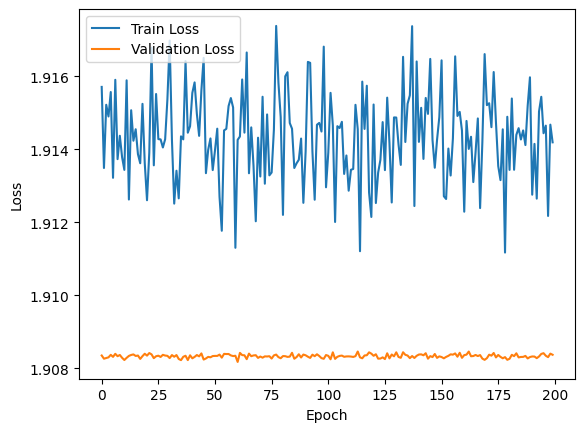

test...
Test Accuracy: 0.32791728212703103
Micro F1: 0.32791728212703103
Macro F1: 0.14683497434356055
Epoch: 0, Time: 0.01581s, Loss: 1.68088
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: False
    weight_decay: 0.0005
), Loss: 1.68088, Val Loss: 1.68088, Validation Accuracy: 0.31314623338257014
Epoch: 1, Time: 0.04197s, Loss: 1.71321
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: False
    weight_decay: 0.0005
), Loss: 1.71321, Val Loss: 1.71321, Validation Accuracy: 0.33382570162481534
Epoch: 2, Time: 0.01599s, Loss: 1.70967
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
  

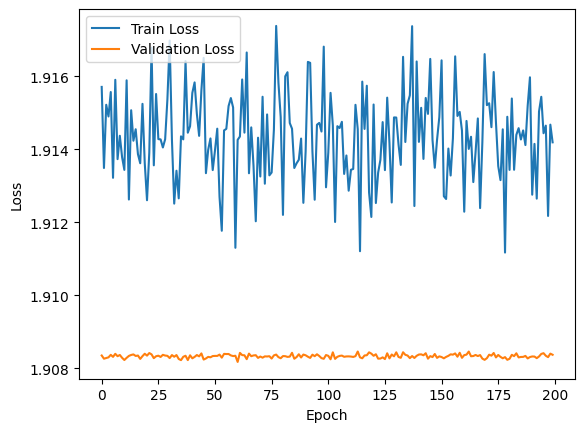

test...
Test Accuracy: 0.32791728212703103
Micro F1: 0.32791728212703103
Macro F1: 0.14683497434356055
Epoch: 0, Time: 0.01735s, Loss: 1.67461
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: False
    weight_decay: 0.0005
), Loss: 1.67461, Val Loss: 1.67461, Validation Accuracy: 0.3397341211225997
Epoch: 1, Time: 0.01495s, Loss: 1.67942
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: False
    weight_decay: 0.0005
), Loss: 1.67942, Val Loss: 1.67942, Validation Accuracy: 0.3397341211225997
Epoch: 2, Time: 0.01272s, Loss: 1.68458
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    

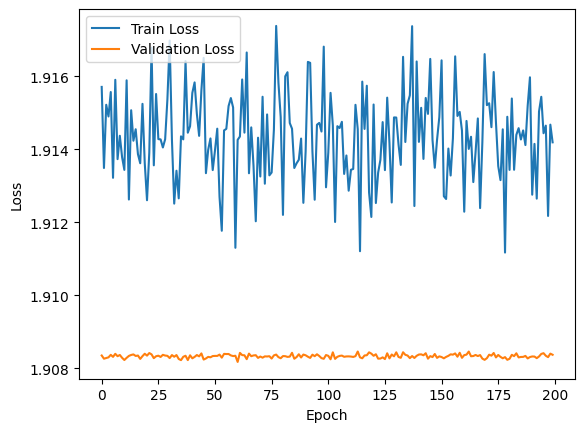

test...
Test Accuracy: 0.32791728212703103
Micro F1: 0.32791728212703103
Macro F1: 0.14683497434356055
Epoch: 0, Time: 0.01602s, Loss: 1.67403
Epoch: 0, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: False
    weight_decay: 0.0005
), Loss: 1.67403, Val Loss: 1.67403, Validation Accuracy: 0.34268833087149186
Epoch: 1, Time: 0.01850s, Loss: 1.67921
Epoch: 1, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.5
    maximize: False
    weight_decay: 0.0005
), Loss: 1.67921, Val Loss: 1.67921, Validation Accuracy: 0.3412112259970458
Epoch: 2, Time: 0.01557s, Loss: 1.66911
Epoch: 2, LR: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
   

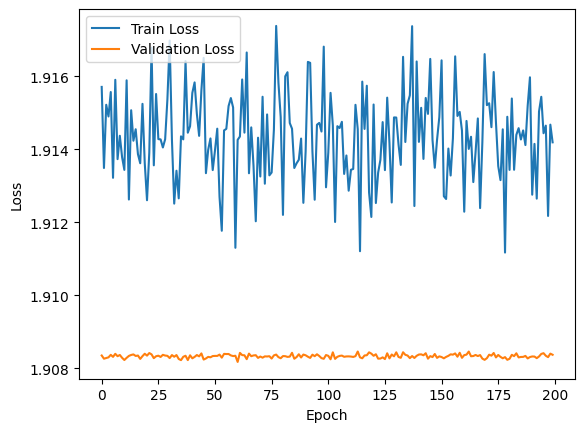

test...
Test Accuracy: 0.32791728212703103
Micro F1: 0.32791728212703103
Macro F1: 0.14683497434356055
test acc: 0.3282127031019203 test acc std: 0.0005908419497784313


test microf1: 0.3282127031019203 test macrof1: 0.15056871634732988


In [43]:
best_state = None
best_epoch, best_val = 0, 0
evaluator = Evaluator(["accuracy", "f1_score", {"f1_score": {"average": "micro"}}])

all_acc, all_microf1, all_macrof1 = [],[],[]
for run in range(5):
    for epoch in range(num_epochs):
        model_hcha.train()
        st = time.time()
        optimizer.zero_grad()
        outs = model_hcha(data.x, data.edge_index)
        outs, lbl = outs[idx_train], lbls[idx_train]
        
        loss = F.cross_entropy(outs, lbl)
        loss.backward()
        optimizer.step()
        print(f"Epoch: {epoch}, Time: {time.time()-st:.5f}s, Loss: {loss.item():.5f}")

        # validation

        model_hypergcn.eval()
        with torch.no_grad():
            outs = model_hcha(data.x, data.edge_index)
            
            outs, lbl = outs[idx_val], lbls[idx_val]
            res = evaluator.test(lbl, outs)

            _, predicted = torch.max(outs, 1)
            correct = (predicted == lbl).sum().item()
            total = lbl.size(0)
            val_acc = correct / total
            print(f"Epoch: {epoch}, LR: {optimizer}, Loss: {loss.item():.5f}, Val Loss: {loss.item():.5f}, Validation Accuracy: {val_acc}")
            

            # Save the model if it has the best validation accuracy
            if val_acc > best_val:
                print(f"update best: {val_acc:.5f}")
                best_val = val_acc
                best_state = deepcopy(model_hcha.state_dict())
                torch.save(model_hcha.state_dict(), 'hcha_coauthorcora_best_model.pth')
        
    print("\ntrain finished!")
    print(f"best val: {best_val:.5f}")

    # 绘制曲线图
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # test
    print("test...")
    model_hcha.load_state_dict(best_state)

    model_hcha.eval()
    with torch.no_grad():
        outs = model_hcha(data.x, data.edge_index)
        outs, lbl = outs[idx_test], lbls[idx_test]

        # Calculate accuracy
        _, predicted = torch.max(outs, 1)
        correct = (predicted == lbl).sum().item()
        total = lbl.size(0)
        test_acc = correct / total
        print(f'Test Accuracy: {test_acc}')

        # Calculate micro F1
        micro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='micro')
        print(f'Micro F1: {micro_f1}')

        # Calculate macro F1
        macro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='macro')
        print(f'Macro F1: {macro_f1}')
    
    all_acc.append(test_acc)
    all_microf1.append(micro_f1)
    all_macrof1.append(macro_f1)

# avg of 5 times
print('test acc:', np.mean(all_acc), 'test acc std:', np.std(all_acc))
print('\n')
print('test microf1:', np.mean(all_microf1), 'test macrof1:', np.mean(all_macrof1))


        



#### UniGIN on CoauthorCora Dataset

In [44]:
G,X, X.shape

(Hypergraph(num_v=2708, num_e=970),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([2708, 1433]))

Epoch: 0, LR: 0.5, Loss: 2.87989, Val Loss: 2.87989, Validation Accuracy: 0.31610044313146235
update best: 0.31610
Epoch: 1, LR: 0.5, Loss: 1.58488, Val Loss: 1.58488, Validation Accuracy: 0.3190546528803545
update best: 0.31905
Epoch: 2, LR: 0.5, Loss: 1.81232, Val Loss: 1.81232, Validation Accuracy: 0.5627769571639586
update best: 0.56278
Epoch: 3, LR: 0.5, Loss: 1.28706, Val Loss: 1.28706, Validation Accuracy: 0.6144756277695717
update best: 0.61448
Epoch: 4, LR: 0.5, Loss: 1.01457, Val Loss: 1.01457, Validation Accuracy: 0.6336779911373708
update best: 0.63368
Epoch: 5, LR: 0.5, Loss: 0.98625, Val Loss: 0.98625, Validation Accuracy: 0.6661742983751846
update best: 0.66617
Epoch: 6, LR: 0.5, Loss: 0.93572, Val Loss: 0.93572, Validation Accuracy: 0.6440177252584933
Epoch: 7, LR: 0.5, Loss: 0.95556, Val Loss: 0.95556, Validation Accuracy: 0.6514032496307238
Epoch: 8, LR: 0.5, Loss: 0.96105, Val Loss: 0.96105, Validation Accuracy: 0.6809453471196455
update best: 0.68095
Epoch: 9, LR: 0

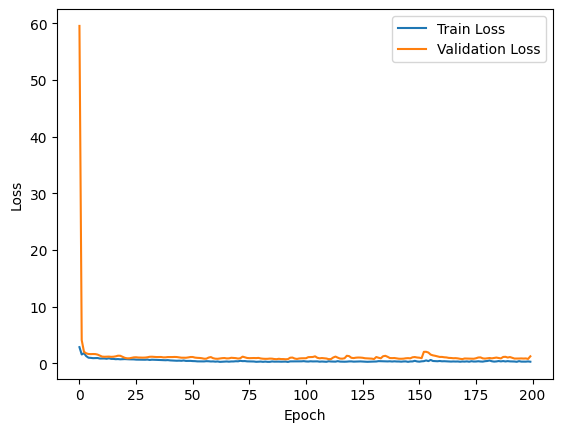

test...
Test Accuracy: 0.8079763663220089
Micro F1: 0.8079763663220088
Macro F1: 0.7908802424259779
Epoch: 0, LR: 0.5, Loss: 0.31396, Val Loss: 0.31396, Validation Accuracy: 0.8035450516986706
Epoch: 1, LR: 0.5, Loss: 0.33921, Val Loss: 0.33921, Validation Accuracy: 0.7887740029542097
Epoch: 2, LR: 0.5, Loss: 0.32699, Val Loss: 0.32699, Validation Accuracy: 0.7902511078286558
Epoch: 3, LR: 0.5, Loss: 0.34082, Val Loss: 0.34082, Validation Accuracy: 0.7872968980797637
Epoch: 4, LR: 0.5, Loss: 0.36538, Val Loss: 0.36538, Validation Accuracy: 0.7813884785819794
Epoch: 5, LR: 0.5, Loss: 0.40730, Val Loss: 0.40730, Validation Accuracy: 0.7843426883308715
Epoch: 6, LR: 0.5, Loss: 0.51516, Val Loss: 0.51516, Validation Accuracy: 0.7902511078286558
Epoch: 7, LR: 0.5, Loss: 0.45424, Val Loss: 0.45424, Validation Accuracy: 0.7784342688330872
Epoch: 8, LR: 0.5, Loss: 0.38730, Val Loss: 0.38730, Validation Accuracy: 0.7740029542097489
Epoch: 9, LR: 0.5, Loss: 0.35692, Val Loss: 0.35692, Validation

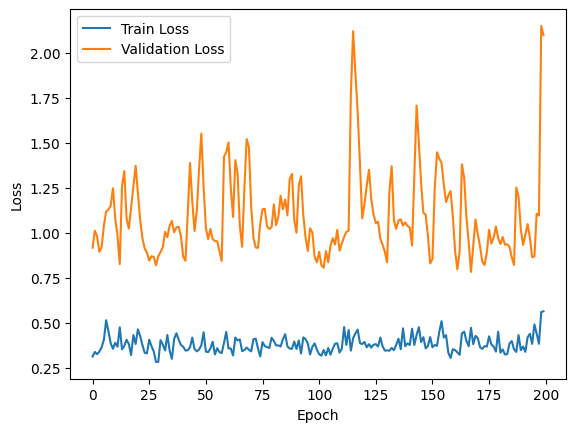

test...
Test Accuracy: 0.8079763663220089
Micro F1: 0.8079763663220088
Macro F1: 0.7908802424259779
Epoch: 0, LR: 0.5, Loss: 0.36549, Val Loss: 0.36549, Validation Accuracy: 0.8050221565731167
Epoch: 1, LR: 0.5, Loss: 0.27612, Val Loss: 0.27612, Validation Accuracy: 0.7725258493353028
Epoch: 2, LR: 0.5, Loss: 0.43345, Val Loss: 0.43345, Validation Accuracy: 0.7858197932053176
Epoch: 3, LR: 0.5, Loss: 0.42177, Val Loss: 0.42177, Validation Accuracy: 0.7961595273264401
Epoch: 4, LR: 0.5, Loss: 0.38733, Val Loss: 0.38733, Validation Accuracy: 0.7813884785819794
Epoch: 5, LR: 0.5, Loss: 0.53427, Val Loss: 0.53427, Validation Accuracy: 0.7828655834564254
Epoch: 6, LR: 0.5, Loss: 0.43153, Val Loss: 0.43153, Validation Accuracy: 0.7828655834564254
Epoch: 7, LR: 0.5, Loss: 0.47205, Val Loss: 0.47205, Validation Accuracy: 0.7725258493353028
Epoch: 8, LR: 0.5, Loss: 0.45254, Val Loss: 0.45254, Validation Accuracy: 0.794682422451994
Epoch: 9, LR: 0.5, Loss: 0.46822, Val Loss: 0.46822, Validation 

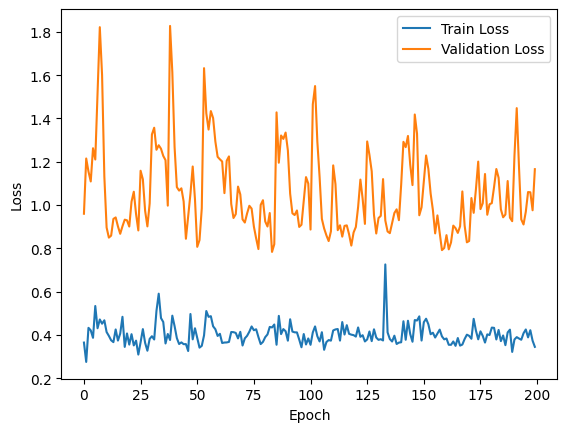

test...
Test Accuracy: 0.793205317577548
Micro F1: 0.793205317577548
Macro F1: 0.7768515550982819
Epoch: 0, LR: 0.5, Loss: 0.34992, Val Loss: 0.34992, Validation Accuracy: 0.7976366322008862
Epoch: 1, LR: 0.5, Loss: 0.42413, Val Loss: 0.42413, Validation Accuracy: 0.7976366322008862
Epoch: 2, LR: 0.5, Loss: 0.45215, Val Loss: 0.45215, Validation Accuracy: 0.794682422451994
Epoch: 3, LR: 0.5, Loss: 0.37469, Val Loss: 0.37469, Validation Accuracy: 0.794682422451994
Epoch: 4, LR: 0.5, Loss: 0.38571, Val Loss: 0.38571, Validation Accuracy: 0.7828655834564254
Epoch: 5, LR: 0.5, Loss: 0.43030, Val Loss: 0.43030, Validation Accuracy: 0.794682422451994
Epoch: 6, LR: 0.5, Loss: 0.40183, Val Loss: 0.40183, Validation Accuracy: 0.7917282127031019
Epoch: 7, LR: 0.5, Loss: 0.37581, Val Loss: 0.37581, Validation Accuracy: 0.7843426883308715
Epoch: 8, LR: 0.5, Loss: 0.39300, Val Loss: 0.39300, Validation Accuracy: 0.7784342688330872
Epoch: 9, LR: 0.5, Loss: 0.45177, Val Loss: 0.45177, Validation Accu

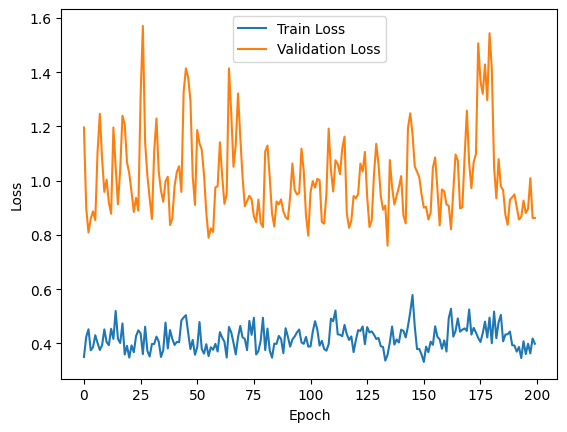

test...
Test Accuracy: 0.793205317577548
Micro F1: 0.793205317577548
Macro F1: 0.7768515550982819
Epoch: 0, LR: 0.5, Loss: 0.31988, Val Loss: 0.31988, Validation Accuracy: 0.8005908419497785
Epoch: 1, LR: 0.5, Loss: 0.29123, Val Loss: 0.29123, Validation Accuracy: 0.7887740029542097
Epoch: 2, LR: 0.5, Loss: 0.40482, Val Loss: 0.40482, Validation Accuracy: 0.7961595273264401
Epoch: 3, LR: 0.5, Loss: 0.45131, Val Loss: 0.45131, Validation Accuracy: 0.7769571639586411
Epoch: 4, LR: 0.5, Loss: 0.51662, Val Loss: 0.51662, Validation Accuracy: 0.7887740029542097
Epoch: 5, LR: 0.5, Loss: 0.44323, Val Loss: 0.44323, Validation Accuracy: 0.7607090103397341
Epoch: 6, LR: 0.5, Loss: 0.55431, Val Loss: 0.55431, Validation Accuracy: 0.7548005908419497
Epoch: 7, LR: 0.5, Loss: 0.52963, Val Loss: 0.52963, Validation Accuracy: 0.7843426883308715
Epoch: 8, LR: 0.5, Loss: 0.48031, Val Loss: 0.48031, Validation Accuracy: 0.8020679468242246
Epoch: 9, LR: 0.5, Loss: 0.46454, Val Loss: 0.46454, Validation A

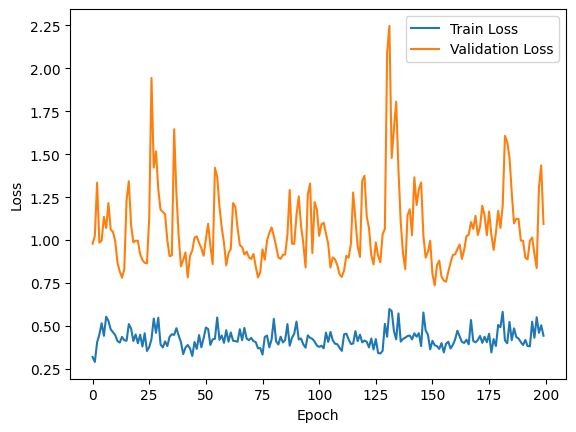

test...
Test Accuracy: 0.8035450516986706
Micro F1: 0.8035450516986706
Macro F1: 0.7863869433647858
test acc: 0.8011816838995569 test acc std: 0.006710674559291331


test microf1: 0.8011816838995568 test macrof1: 0.784370107682661


In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

set_seed(42)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
evaluator = Evaluator(["accuracy", "f1_score", {"f1_score": {"average": "micro"}}])

model_unigin = UniGIN(X.shape[1], 256, cora_data["num_classes"], use_bn=True)
optimizer = optim.Adam(model_unigin.parameters(), lr=0.5, weight_decay=5e-4)

X, lbls = X.to(device), lbls.to(device)
G = G.to(device)
model_unigin = model_unigin.to(device)

best_state = None
best_epoch, best_val = 0, 0
num_epochs = 200
all_acc, all_microf1, all_macrof1 = [],[],[]
for run in range(5):

    train_losses = []  # 新增：用于存储每个epoch的train_loss
    val_losses = []  # 新增：用于存储每个epoch的val_loss
    for epoch in range(num_epochs):
        # train
        model_unigin.train()
        optimizer.zero_grad()
        outs = model_unigin(X,G)
        outs, lbl = outs[idx_train], lbls[idx_train]
        loss = F.cross_entropy(outs, lbl)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # validation
        model_unigin.eval()
        with torch.no_grad():
            outs = model_unigin(X,G)
            outs, lbl = outs[idx_val], lbls[idx_val]
            val_loss = F.cross_entropy(outs, lbl)
            val_losses.append(val_loss)  # 新增：记录val_loss

            _, predicted = torch.max(outs, 1)
            correct = (predicted == lbl).sum().item()
            total = lbl.size(0)
            val_acc = correct / total
            print(f"Epoch: {epoch}, LR: {optimizer.param_groups[0]['lr']}, Loss: {loss.item():.5f}, Val Loss: {loss.item():.5f}, Validation Accuracy: {val_acc}")
            

            # Save the model if it has the best validation accuracy
            if val_acc > best_val:
                print(f"update best: {val_acc:.5f}")
                best_val = val_acc
                best_state = deepcopy(model_unigin.state_dict())
                torch.save(model_unigin.state_dict(), 'unigin_coauthorcora_best_model.pth')

    print("\ntrain finished!")
    print(f"best val: {best_val:.5f}")

    # 绘制曲线图
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # test
    print("test...")
    model_unigin.load_state_dict(best_state)

    model_unigin.eval()
    with torch.no_grad():
        outs = model_unigin(X, G)
        outs, lbl = outs[idx_test], lbls[idx_test]

        # Calculate accuracy
        _, predicted = torch.max(outs, 1)
        correct = (predicted == lbl).sum().item()
        total = lbl.size(0)
        test_acc = correct / total
        print(f'Test Accuracy: {test_acc}')

        # Calculate micro F1
        micro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='micro')
        print(f'Micro F1: {micro_f1}')

        # Calculate macro F1
        macro_f1 = f1_score(lbl.cpu(), predicted.cpu(), average='macro')
        print(f'Macro F1: {macro_f1}')

    all_acc.append(test_acc)
    all_microf1.append(micro_f1)
    all_macrof1.append(macro_f1)

# avg of 5 times
print('test acc:', np.mean(all_acc), 'test acc std:', np.std(all_acc))
print('\n')
print('test microf1:', np.mean(all_microf1), 'test macrof1:', np.mean(all_macrof1))